In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [127]:
#reading the dataset downloaded from kaggle
iris= pd.read_csv('Iris.csv')
iris.drop('Id',axis=1,inplace=True)

In [128]:
#divide the datset into features and targets
dataX = iris.iloc[:,:4]
dataY = iris['Species']

In [129]:
dataX.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [130]:
#Normalize the dataset onto the same scale (not necessary in this dataset)
scaler = StandardScaler().fit_transform(dataX)

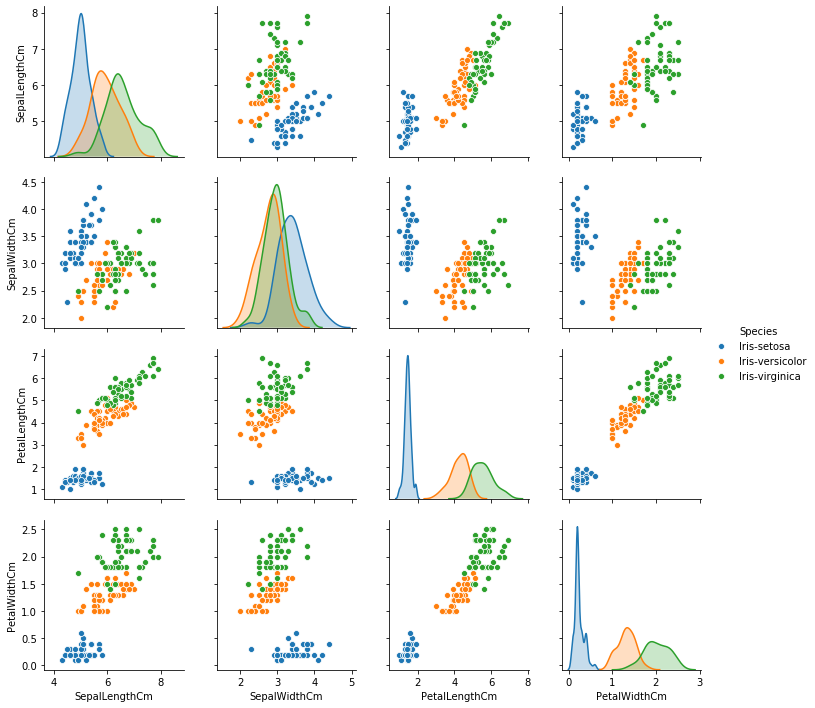

In [131]:
# pairplot to understand the relation between different features
pair = sns.pairplot(iris,hue='Species')

In [132]:
# divide the dataset into training and test data
X_train,X_test,y_train,y_test = train_test_split(dataX,dataY,random_state=0)

## K-nearest Neighbor Classification

In [133]:
# using Cross-Validation to find the optimum value of K with minimum error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
score = list()
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
    accuracy = cross_val_score(knn,dataX,dataY,scoring='accuracy',cv=5)
    score.append(accuracy.mean(axis=0))

the value of k with minimum error is 10 with accuracy of 98.66666666666667


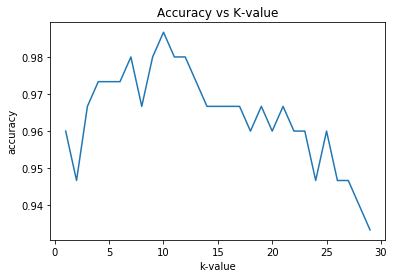

In [134]:
# Plotting the accuracy of the model with different values of K

error = [1 - x for x in score]
plt.plot(range(1,30),score)
plt.title('Accuracy vs K-value')
plt.xlabel('k-value')
plt.ylabel('accuracy')
error_min = error.index(min(error))
accuracy = score[error_min]*100
print('the value of k with minimum error is {0} with accuracy of {1}'.format(error_min+1,accuracy))


In [135]:
# Train the model with Training Data
knn_optimal = KNeighborsClassifier(n_neighbors=10)
knn_optimal.fit(dataX,dataY)
accuracy_knn = knn_optimal.score(X_test,y_test)

In [137]:
# generate prediction on a test set data 
pred_x = [[4.9,3.0,1.4,0.2]]
pred_y_knn = knn_optimal.predict(pred_x)
pred_y_knn = str(pred_y_knn)
print('the predicted species is {0}'.format(pred_y_knn))

the predicted species is ['Iris-setosa']


## Decision-Tree Classification

In [138]:
# cross-validation score to find the optimized value of depth

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(max_depth=3,random_state=0)
accuracy = cross_val_score(dtc,dataX,dataY,cv=5)
print(accuracy.mean(axis=0))

0.96


In [121]:
dtc_optimized = DecisionTreeClassifier(max_depth=3)
dtc_optimized.fit(X_train,y_train)
accuracy_dtc = dtc_optimized.score(X_test,y_test)

[Text(348.75, 792.75, 'petal length (cm) <= 2.35\nentropy = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(232.5, 566.25, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(465.0, 566.25, 'petal length (cm) <= 4.95\nentropy = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(232.5, 339.75, 'petal width (cm) <= 1.65\nentropy = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(116.25, 113.25, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(348.75, 113.25, 'entropy = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(697.5, 339.75, 'petal width (cm) <= 1.75\nentropy = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(581.25, 113.25, 'entropy = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(813.75, 113.25, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = virginica')]

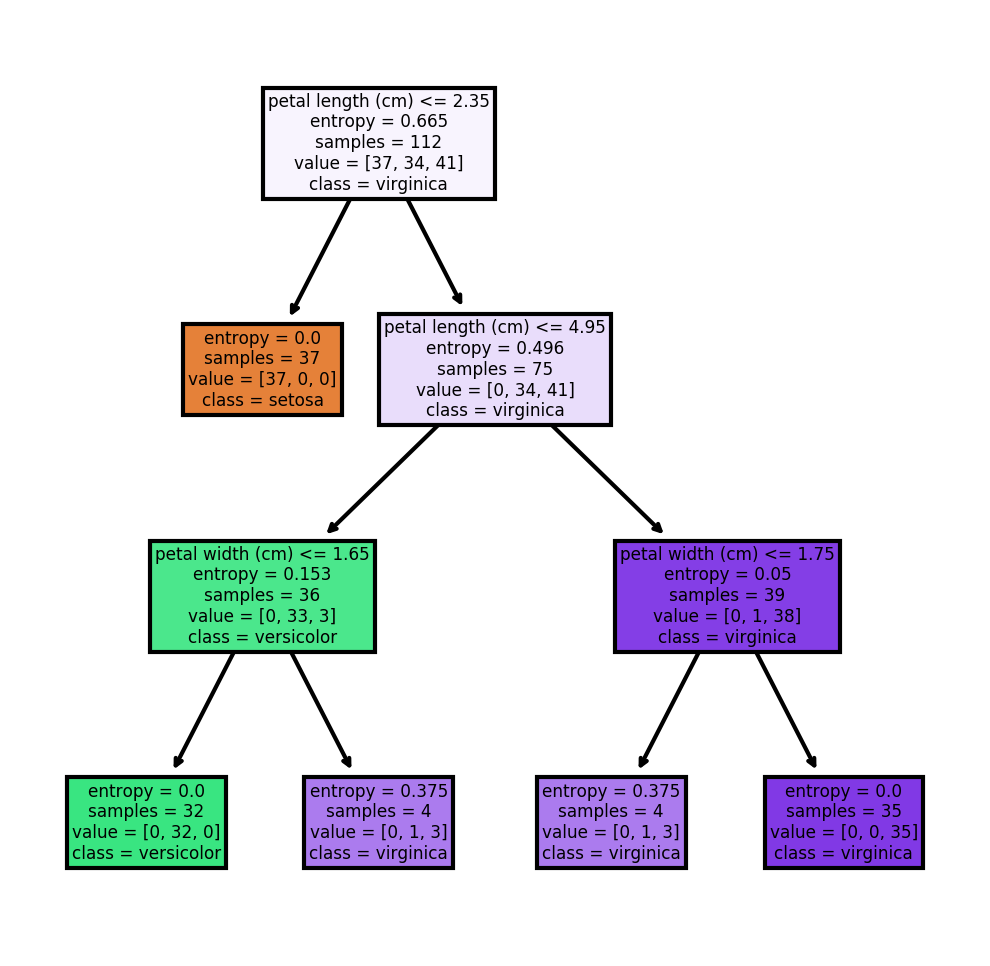

In [139]:
# Visualizing the Decission Tree

fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

cn = ['setosa', 'versicolor', 'virginica']
      
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)    
      
tree.plot_tree(dtc_optimized,
              feature_names=fn,
              class_names=cn,
               filled=True)

In [140]:
# predicting the value using test set data (pred_x defined in knn)
pred_y_dct = str(dtc_optimized.predict(pred_x))
print('the predicted flower from decision-tree is {0}'.format(pred_y_dct))


the predicted flower from decision-tree is ['Iris-setosa']


## SVM Classifier

In [141]:
# using Cross-Validation Score to find the optimum value of C
from sklearn.svm import SVC
svc_accuracy = list()
for c in range(1,100):
    svc = SVC(C=c,kernel='rbf')
    accuracy = cross_val_score(svc,dataX,dataY)
    svc_accuracy.append(accuracy.mean(axis=0))

the accuracy is highest (0.9865196078431372) at value of C = 2


0.9865196078431372

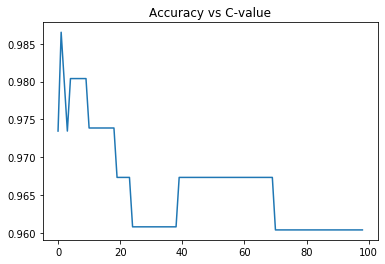

In [142]:

max_acc = max(svc_accuracy)
max_c = svc_accuracy.index(max_acc)+1
print('the accuracy is highest ({0}) at value of C = {1}'.format(max_acc,max_c))
plt.plot(svc_accuracy)
plt.title('Accuracy vs C-value')
svc_accuracy[1]

In [143]:
svc_optimized = SVC(kernel='rbf',C=2).fit(X_train,y_train)
accuracy_svc = svc_optimized.score(X_test,y_test)

In [144]:
pred_y_svc = str(svc_optimized.predict(pred_x))
print('the flower predicted from SVM classifier is {0}'.format(pred_y_svc))

the flower predicted from SVM classifier is ['Iris-setosa']


In [145]:
print('the accuracy of the model using K-nearest Neighbor is {0}'.format(accuracy_knn))
print('the accuracy of the model using Decision tree is {0}'.format(accuracy_dtc))
print('the accuracy of the model using SVM Classifier is {0}'.format(accuracy_svc))

the accuracy of the model using K-nearest Neighbor is 0.9736842105263158
the accuracy of the model using Decision tree is 0.9736842105263158
the accuracy of the model using SVM Classifier is 0.9736842105263158
